In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r"C:\Users\OWNER\Desktop\Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Cleaning out administrative transactions and Blank Customer ids

In [ ]:
#getting rid of administrative transactions(transactions with the UnitPrice = 0)
df_cleaned = df[df['UnitPrice'] != 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df_cleaned = df_cleaned[df_cleaned['StockCode'] != 'AMAZONFEE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df_cleaned = df_cleaned[df_cleaned['CustomerID'].notna() & (df_cleaned['CustomerID'] != '')]

In [8]:
df_cleaned = df_cleaned[df_cleaned['StockCode'] != 'BANK CHARGES']

In [10]:
non_sale_codes = ['POST', 'M', 'D', 'C2', 'PADS', 'DOT', 'CRUK']

df_cleaned = df_cleaned[~df_cleaned['StockCode'].str.contains('|'.join(non_sale_codes), case=False, na=False)]

Splitting InvoiceDate Column into two separate columns(Date and Time) and transforming it into the datetime format

In [11]:
df_cleaned[['Date', 'Time']] = df_cleaned['InvoiceDate'].astype(str).str.split(' ', expand=True, n=1)
print(df_cleaned[['InvoiceDate', 'Date', 'Time']].head())

          InvoiceDate        Date      Time
0 2010-12-01 08:26:00  2010-12-01  08:26:00
1 2010-12-01 08:26:00  2010-12-01  08:26:00
2 2010-12-01 08:26:00  2010-12-01  08:26:00
3 2010-12-01 08:26:00  2010-12-01  08:26:00
4 2010-12-01 08:26:00  2010-12-01  08:26:00


In [12]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

Feature Engineering (Creating a Total cost column calculated from UnitPrice and Quantity)

In [13]:
df_cleaned['TotalCost'] = df_cleaned['UnitPrice'] * df_cleaned['Quantity']
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34


Total Sales

In [ ]:
Total_Sales = df_cleaned['TotalCost'].sum()
print(f"Total Sales: {Total_Sales}")

Total Sales: 8244255.489999999


Average Order Value

In [ ]:
Average_Order_Value = df_cleaned['TotalCost'].mean()
print(f"Average Order Value: {Average_Order_Value}")

Average Sales: 20.496269540961432


Top 10 Products by Quantity Sold

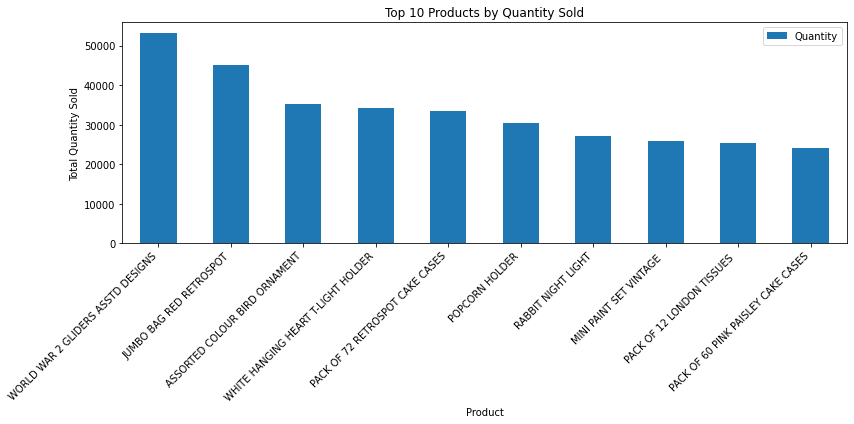

In [30]:
# Aggregating total Quantity by Description
product_quantities = df_cleaned.groupby('Description')['Quantity'].sum().reset_index()

# top 10 products by Quantity
top_10_products = product_quantities.sort_values(by='Quantity', ascending=False).head(10)

# bar chart
top_10_products.plot(kind='bar', x='Description', y='Quantity', figsize=(12, 6))
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

Top 10 highest revenue-generating products

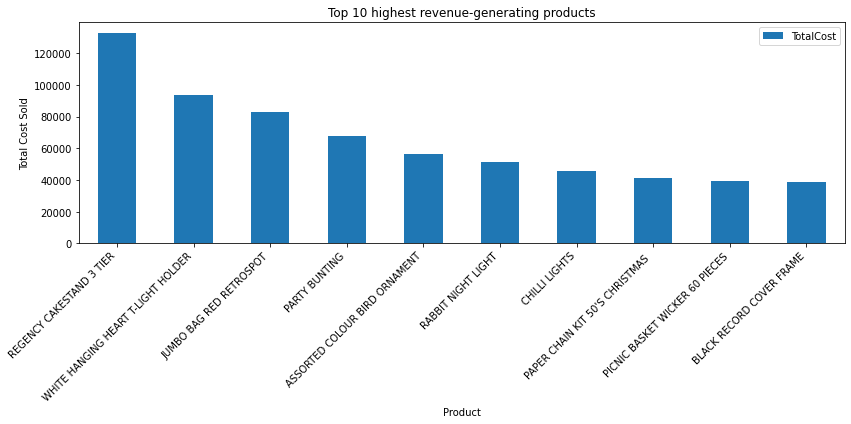

In [31]:
# Aggregating totalCost by Description
product_quantities = df_cleaned.groupby('Description')['TotalCost'].sum().reset_index()

# top 10 products by Quantity
top_10_products = product_quantities.sort_values(by='TotalCost', ascending=False).head(10)

# bar chart
top_10_products.plot(kind='bar', x='Description', y='TotalCost', figsize=(12, 6))
plt.title('Top 10 highest revenue-generating products')
plt.xlabel('Product')
plt.ylabel('Total Cost Sold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

Sales Trend Per Month

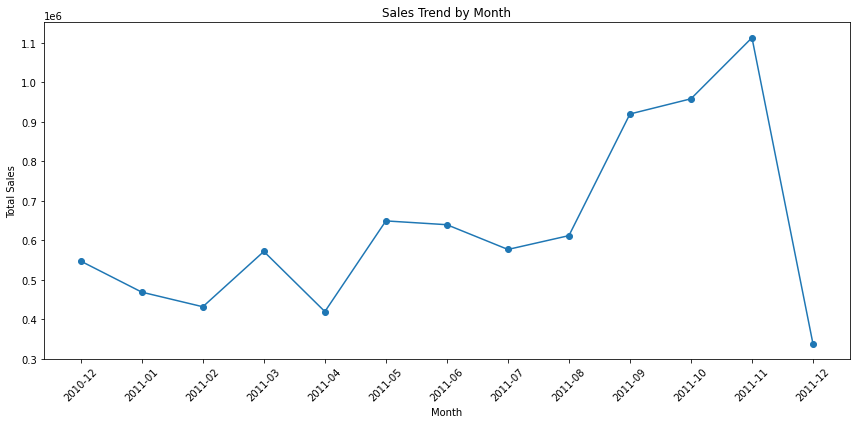

In [18]:
# Ensure 'Date' column is in datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Create a 'YearMonth' column
df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M').astype(str)

# Group by 'YearMonth' and sum 'TotalCost'
monthly_sales = df_cleaned.groupby('YearMonth')['TotalCost'].sum().reset_index()

# Plot sales trend by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalCost'], marker='o')
plt.title('Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#monthly sales
monthly_sales = monthly_sales.rename(columns={'YearMonth': 'Month', 'TotalCost': 'Total Sales'})
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'], format='%Y-%m')
monthly_sales.set_index('Month', inplace=True)
print(monthly_sales)

            Total Sales
Month                  
2010-12-01    547226.48
2011-01-01    468695.34
2011-02-01    431772.90
2011-03-01    571743.59
2011-04-01    419568.32
2011-05-01    649056.52
2011-06-01    639404.75
2011-07-01    576793.99
2011-08-01    611788.87
2011-09-01    919645.53
2011-10-01    958099.94
2011-11-01   1112706.75
2011-12-01    337752.51


Scatter plot of Unitprice against Quantity

Text(0.5, 1.0, 'Scatter plot of UnitPrice vs Quantity')

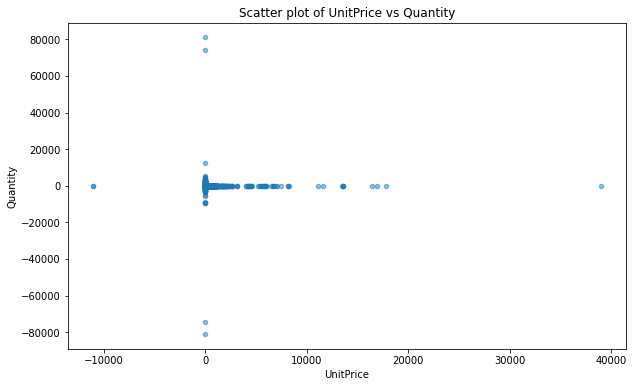

In [20]:
df.plot(kind='scatter', x='UnitPrice', y='Quantity', alpha=0.5, figsize=(10, 6))
plt.title('Scatter plot of UnitPrice vs Quantity')

Number of Purchases per Country

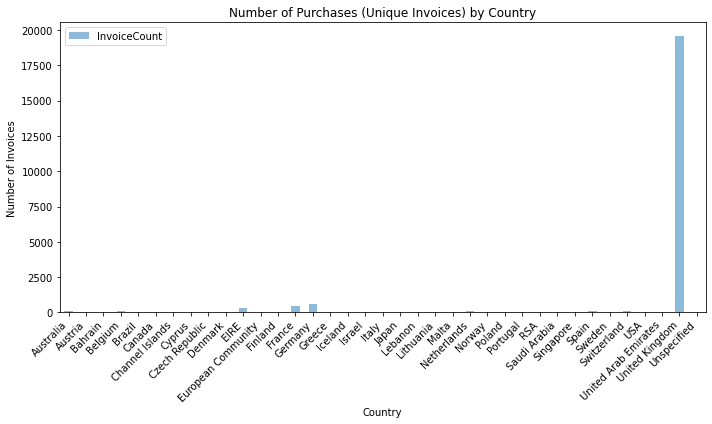

In [21]:
# Aggregate unique InvoiceNo count by Country
invoices_per_country = df_cleaned.groupby('Country')['InvoiceNo'].nunique().reset_index()
invoices_per_country.columns = ['Country', 'InvoiceCount']

# Plot bar chart (all countries or top 10 for clarity)
invoices_per_country.plot(kind='bar', x='Country', y='InvoiceCount', alpha=0.5, figsize=(10, 6))
plt.title('Number of Purchases (Unique Invoices) by Country')
plt.xlabel('Country')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()  # Prevent label cutoff
plt.show()

Revenue generated per country

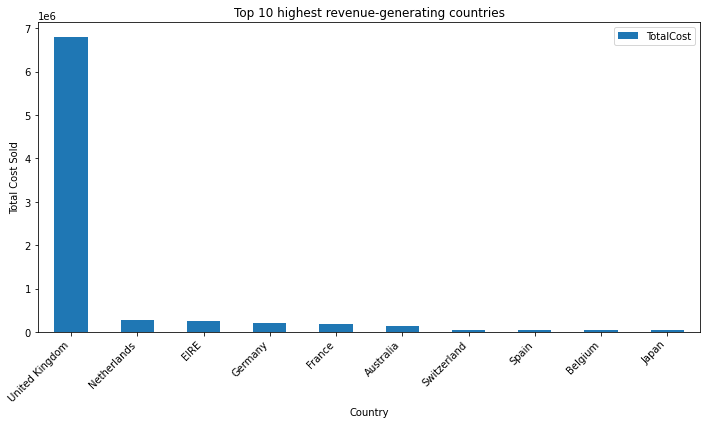

In [22]:
# Aggregate totalCost by Description
product_quantities = df_cleaned.groupby('Country')['TotalCost'].sum().reset_index()

# Select top 10 products by Quantity
top_10_products = product_quantities.sort_values(by='TotalCost', ascending=False).head(10)

# Plot bar chart
top_10_products.plot(kind='bar', x='Country', y='TotalCost', figsize=(10, 6))
plt.title('Top 10 highest revenue-generating countries')
plt.xlabel('Country')
plt.ylabel('Total Cost Sold')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

Revenue generated from countries other than the United Kingdom

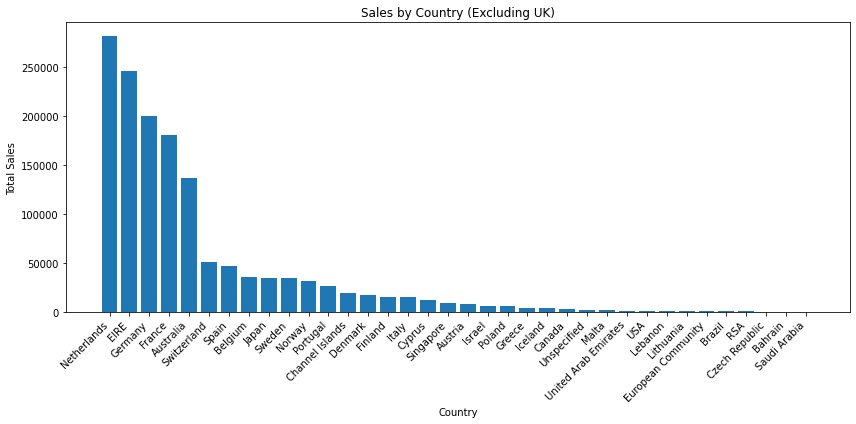

In [23]:
# Filter out UK and group by country
sales_by_country = df_cleaned[df_cleaned['Country'] != 'United Kingdom'].groupby('Country')['TotalCost'].sum().reset_index()

# Sort by sales descending
sales_by_country = sales_by_country.sort_values(by='TotalCost', ascending=False)

# Plot sales by country (excluding UK)
plt.figure(figsize=(12, 6))
plt.bar(sales_by_country['Country'], sales_by_country['TotalCost'])
plt.title('Sales by Country (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 customers based on purchase frequency

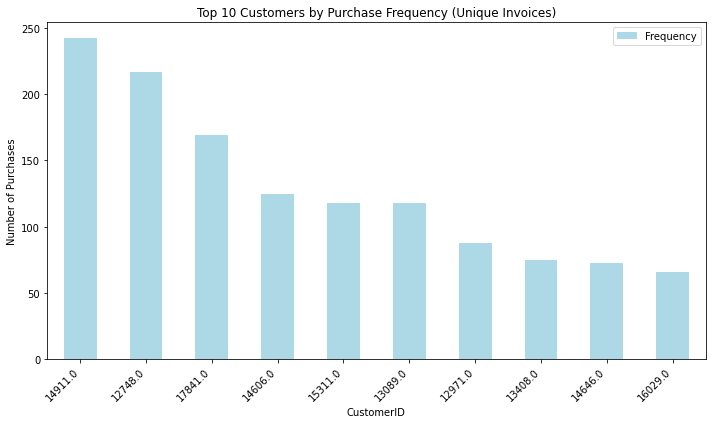

In [24]:
# Calculate purchase frequency per CustomerID
purchase_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchase_frequency.columns = ['CustomerID', 'Frequency']

# Optional: Visualize top 10 customers by frequency
top_10_customers = purchase_frequency.sort_values(by='Frequency', ascending=False).head(10)
top_10_customers.plot(kind='bar', x='CustomerID', y='Frequency', figsize=(10, 6), color='lightblue')
plt.title('Top 10 Customers by Purchase Frequency (Unique Invoices)')
plt.xlabel('CustomerID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This section calculates RFM scores for each customer, assigns segmentation labels based on purchasing behavior, and visualizes the distribution of customer segments using a bar chart.

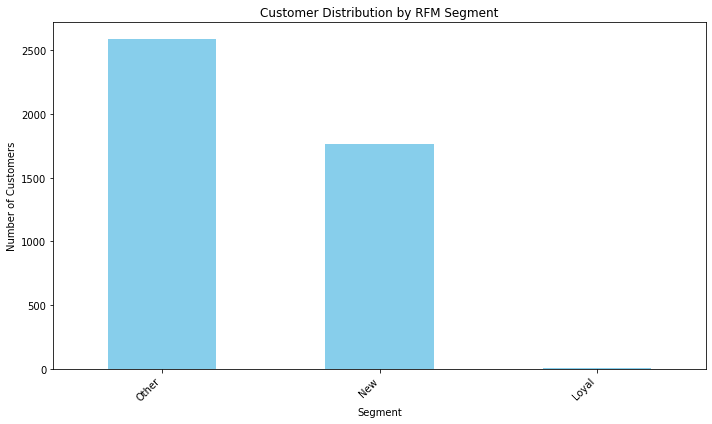

In [25]:
# Calculate RFM
reference_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalCost': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Assign RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
try:
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])
except:
    rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)
    rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segment customers
def segment_customer(row):
    if row['RFM_Score'] in ['555', '554', '545', '544']:
        return 'Champions'
    elif row['F_Score'] in [4, 5] and row['R_Score'] >= 3:
        return 'Loyal'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'At Risk'
    elif row['R_Score'] >= 4 and row['F_Score'] <= 2:
        return 'New'
    else:
        return 'Other'
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Visualize segment distribution
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# RFM Cluster Summary

## Number of Customers per Cluster

Low-value     3070
Loyal         1073
High-value     207
At-risk         11

## Traits of Each Cluster

- **High-value:** Customers with high frequency and monetary value, and recent purchases. They are your best customers.
- **Loyal:** Customers who purchase often, but may not always spend the most. They are engaged and reliable.
- **At-risk:** Customers who used to buy frequently or spend a lot, but haven't purchased recently. They may be slipping away.
- **Low-value:** Customers with low frequency, low spend, and/or long time since last purchase. They are least engaged.

## Suggested Marketing Actions

- **High-value:** Offer loyalty rewards, exclusive deals, and early access to new products to retain and delight them.
- **Loyal:** Send thank-you messages, referral incentives, and personalized recommendations to maintain engagement.
- **At-risk:** Use re-engagement emails, special win-back offers, and feedback requests to bring them back.
- **Low-value:** Send introductory offers, educational content, or surveys to understand their needs and encourage more purchases.

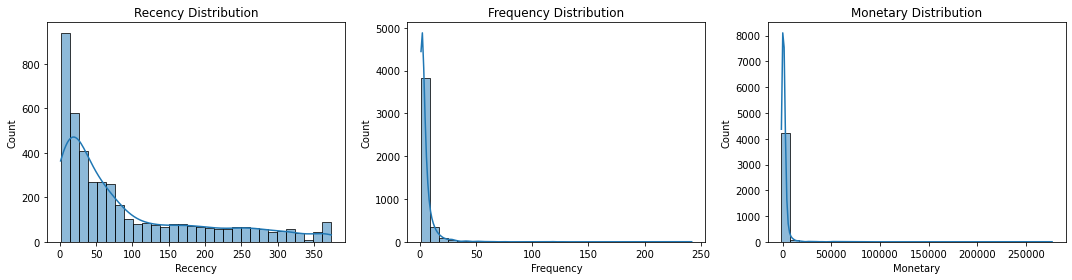

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


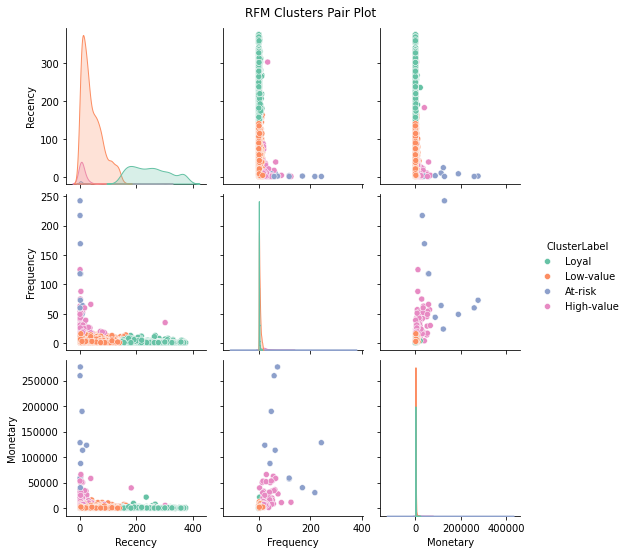

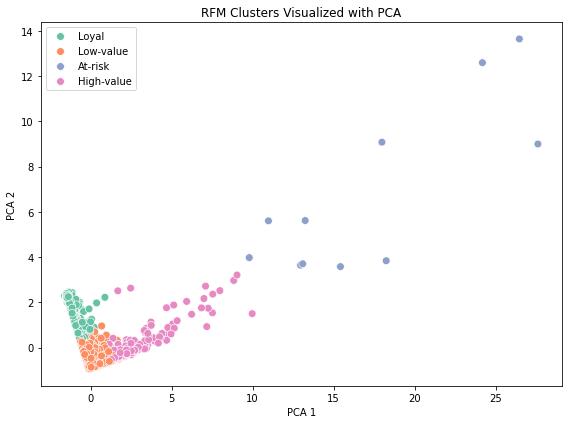

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# 1. Normalize/scale RFM data
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# 2. Distribution plots of R, F, M
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# 3. KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 4. Label clusters with business meaning
cluster_labels = {
    0: 'High-value',
    1: 'At-risk',
    2: 'Loyal',
    3: 'Low-value'
}
rfm['ClusterLabel'] = rfm['Cluster'].map(cluster_labels)

# 5. Visualize clusters using pair plots
sns.pairplot(rfm, vars=['Recency', 'Frequency', 'Monetary'], hue='ClusterLabel', palette='Set2')
plt.suptitle('RFM Clusters Pair Plot', y=1.02)
plt.show()

# 6. Visualize clusters using PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='ClusterLabel', palette='Set2', s=60)
plt.title('RFM Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
rfm['ClusterLabel'].value_counts()

Low-value     3070
Loyal         1073
High-value     207
At-risk         11
Name: ClusterLabel, dtype: int64